# Multivariate Regression

Dataset: The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6
years (2006-2011), when the plant was set to work with full load.

Datapoints: 9568

Attributes: Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum
(V).

Temperature (T) in the range 1.81°C and 37.11°C,
Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
Relative Humidity (RH) in the range 25.56% to 100.16%
Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
Net hourly electrical energy output (EP) 420.26-495.76 MW
Predict: the net hourly electrical energy output (PE) of the plant.

Multivariate Regression: It is a technique to estimate the more than one independent
variable with more than one dependent variable which are linearly related. This method
predict behaviour of dependent variable according to independent variable. This method
includes selecting features, normalizing the features, selecting hypothesis and cost function.
Using this technique accuracy with this dataset reached upto 99.585% and error rate is 0.414
in %.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("chennai_house_multivariate_train.csv")
df.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1,1,1,1,1,1,2,1,4.0,3.9,4.9,380000,144400,7600000
1,2,1986,26,2,1,2,0,1,1,1,4,4.9,4.2,2.5,760122,304049,21717770
2,1,909,70,1,1,1,1,1,2,1,5,4.1,3.8,2.2,421094,92114,13159200
3,7,1855,14,3,2,0,0,3,3,2,3,4.7,3.9,3.6,356321,77042,9630290
4,4,1226,84,1,1,1,1,3,1,1,2,3.0,2.5,4.1,237000,74063,7406250


In [3]:
df = (df - df.mean())/(df.max() - df.min())
df.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


In [4]:
df.describe()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
count,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03
mean,2.093119e-17,-3.532948e-17,-1.665612e-19,1.454912e-16,1.352477e-16,-4.870990e-17,-4.619668e-16,1.933591e-16,-1.427615e-16,1.097268e-16,7.954223e-17,1.158146e-15,3.101175e-15,-2.912656e-15,3.284957e-18,-1.091901e-17,9.836365e-18
std,3.035182e-01,2.282279e-01,2.875667e-01,2.668545e-01,4.105341e-01,3.531722e-01,4.999841e-01,4.059612e-01,4.257780e-01,3.991885e-01,3.008085e-01,2.967964e-01,2.986970e-01,2.951563e-01,1.556604e-01,1.597292e-01,1.742934e-01
min,-4.819970e-01,-4.410154e-01,-4.975021e-01,-2.113130e-01,-2.145358e-01,-4.187365e-01,-5.075846e-01,-4.993332e-01,-6.247708e-01,-5.417570e-01,-6.615769e-01,-5.094849e-01,-5.013002e-01,-4.934767e-01,-3.353957e-01,-2.768850e-01,-4.061506e-01
25%,-1.486637e-01,-1.943921e-01,-2.475021e-01,-2.113130e-01,-2.145358e-01,-4.187365e-01,-5.075846e-01,-4.993332e-01,-6.247708e-01,-5.417570e-01,-6.157693e-02,-2.428182e-01,-2.679669e-01,-2.601434e-01,-1.136119e-01,-1.156073e-01,-1.211486e-01
50%,1.800300e-02,-3.796781e-03,-2.502084e-03,-2.113130e-01,-2.145358e-01,8.126354e-02,4.924154e-01,6.667778e-04,3.752292e-01,-4.175696e-02,1.384231e-01,-9.484914e-03,-1.300217e-03,6.523309e-03,-2.837781e-02,-2.666370e-02,-2.448916e-02
75%,1.846697e-01,1.812958e-01,2.424979e-01,1.220203e-01,-2.145358e-01,8.126354e-02,4.924154e-01,5.006668e-01,3.752292e-01,4.582430e-01,3.384231e-01,2.571818e-01,2.653664e-01,2.398566e-01,8.189724e-02,9.009882e-02,9.635156e-02
max,5.180030e-01,5.589846e-01,5.024979e-01,7.886870e-01,7.854642e-01,5.812635e-01,4.924154e-01,5.006668e-01,3.752292e-01,4.582430e-01,3.384231e-01,4.905151e-01,4.986998e-01,5.065233e-01,6.646043e-01,7.231150e-01,5.938494e-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002025428F048>,
      dtype=object)

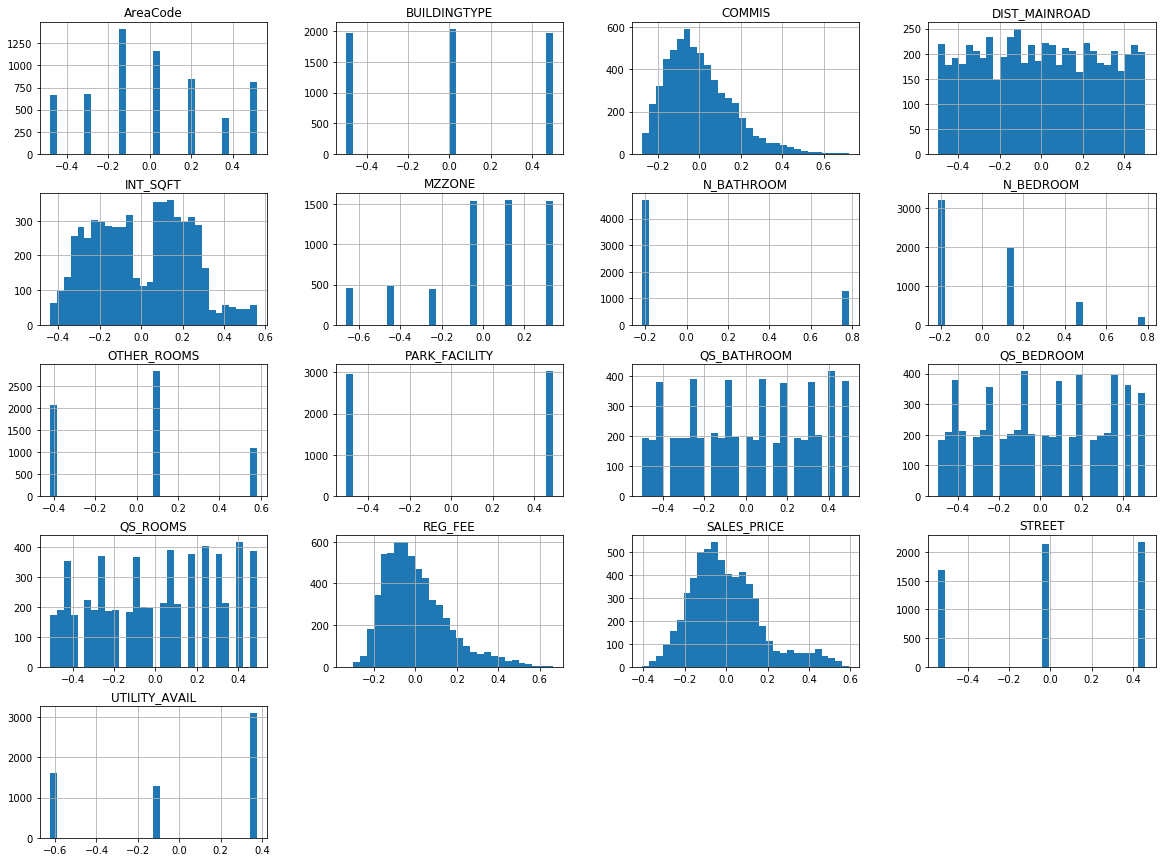

In [5]:
df.hist(bins=30, figsize = (20,15))

In [6]:
df.shape

(5999, 17)

In [7]:
df.insert(0,"Ones",1)
df.head()

,Ones,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,1,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,1,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,1,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,1,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


In [8]:
cols = df.shape[1]
x = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

In [9]:
x = np.matrix(x)
y = np.matrix(y)
theta = np.matrix(np.array([0]*(cols-1)))

In [10]:
x.shape, theta.shape, y.shape

((5999, 17), (1, 17), (5999, 1))

In [11]:
def computeError(x,y,theta):
    inner = np.power(((x*theta.T)-y),2)
    return np.sum(inner)/(2*len(x))

In [12]:
computeError(x,y,theta)

0.015186556392354323

In [13]:
Learn_rate = 1

In [14]:
iters = 150

In [15]:
def gradientDescent(x,y,theta,Learn_rate,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (x*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,x[:,j])
            temp[0,j] = theta[0,j]-((Learn_rate/len(x))*np.sum(term))
        theta = temp
        cost[i] = computeError(x,y,theta)
    return theta, cost

In [16]:
new_theta, cost = gradientDescent(x,y,theta,Learn_rate,iters)
print(new_theta,cost)

[[ 1.61749445e-17 -6.39818746e-02  1.38075852e-01  3.09724881e-03
   7.01090414e-02  2.17123709e-02  1.56359887e-01  2.87829557e-02
  -1.12844191e-01 -6.94872196e-03  9.33655962e-03  1.04579552e-01
   5.41168649e-03  1.21871297e-03  3.72848228e-03  4.05504694e-01
   1.05573436e-01]] [0.01141782 0.00884014 0.00705888 0.00581573 0.00493954 0.00431571
 0.00386679 0.00354003 0.00329924 0.00311941 0.00298317 0.00287836
 0.00279642 0.0027313  0.00267866 0.00263539 0.00259925 0.00256859
 0.00254219 0.00251916 0.00249882 0.00248065 0.00246425 0.00244933
 0.00243564 0.00242299 0.00241122 0.00240023 0.00238989 0.00238014
 0.00237089 0.0023621  0.00235371 0.00234568 0.00233797 0.00233056
 0.00232342 0.00231652 0.00230984 0.00230337 0.00229709 0.00229099
 0.00228505 0.00227927 0.00227363 0.00226812 0.00226274 0.00225749
 0.00225234 0.00224731 0.00224238 0.00223755 0.00223282 0.00222817
 0.00222362 0.00221914 0.00221475 0.00221044 0.0022062  0.00220204
 0.00219795 0.00219392 0.00218997 0.00218608 0

In [17]:
computeError(x,y,new_theta)

0.001997794984267301

In [18]:
Model_price = x.dot(new_theta.T)

In [19]:
import math
erro_r = [np.power((b-a),2) for (a,b) in zip(Model_price, y)]
error0 = np.sum(erro_r)
error = (error0/len(y))*100
print("error % = {}".format(error))

error % = 0.39955899685346025


In [20]:
accuracy = 100 - error
print("accuracy % = {}".format(accuracy))

accuracy % = 99.60044100314654


In [21]:
df.head()

,Ones,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,1,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,1,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,1,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,1,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


In [22]:
def predict(new_theta,accuracy, cols):
    x_unknown = [1]
    for i in range (1,cols-1) :
        attr = float(input ("Enter the attribute {}".format(i)))
        attr = (attr-df.iloc[0:,i].mean())/(df.iloc[0:,i].max()-df.iloc[0:,i].min())
        x_unknown.append(attr)
    x_unknown = np.matrix(x_unknown)
    price = x_unknown.dot(new_theta.T)[0,0]
    Predicted_Price = (price*(df.SALES_PRICE.max()-df.SALES_PRICE.min()))+(df.SALES_PRICE.mean())
    Price_at_Max_Accuracy = (Predicted_Price*(1/accuracy)*100)
    Price_range = Price_at_Max_Accuracy - Predicted_Price
    return Predicted_Price, Price_range

In [23]:
Predicted_Price, Price_range = predict(new_theta,accuracy, cols)
print("Your house cost is " + str(Predicted_Price) + "Lakhs " + "(+or-) " +str(Price_range) + 'Lakhs')


Enter the attribute 14
Enter the attribute 21004
Enter the attribute 3131
Enter the attribute 41
Enter the attribute 51
Enter the attribute 61
Enter the attribute 71
Enter the attribute 81
Enter the attribute 91
Enter the attribute 102
Enter the attribute 111
Enter the attribute 124
Enter the attribute 133.9
Enter the attribute 144.9
Enter the attribute 15380000
Enter the attribute 16144400
Your house cost is 169475.6909106643Lakhs (+or-) 679.8718596955878Lakhs
